In [1]:
#Analysis of traffic road accident

/kaggle/input/global-traffic-accidents-dataset/global_traffic_accidents.csv


# load and explore data set

In [2]:
# read & load the dataset into pandas dataframe
df_file=("/kaggle/input/global-traffic-accidents-dataset/global_traffic_accidents.csv")
df= pd.read_csv(df_file)
df.head(2)

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving


In [3]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 10,000 & Columns: 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [5]:
df.isnull().sum()

Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64

In [7]:
df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


In [8]:
#count duplicates
df.duplicated().sum()

0

# 1.analysis of no of  accident by date and time 

In [10]:
df['Time'].head()


0    06:39
1    02:47
2    02:55
3    11:23
4    12:07
Name: Time, dtype: object

In [12]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert Time column to datetime format explicitly specifying HH:MM format
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

# Extract year, month, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

<Axes: title={'center': 'Accidents Per Year'}, xlabel='Year'>

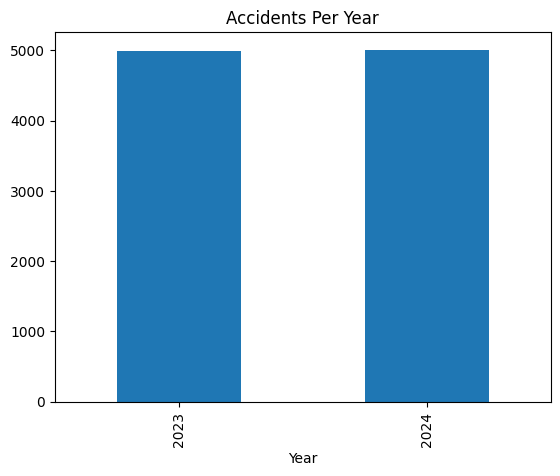

In [14]:

df['Year'].value_counts().sort_index().plot(kind='bar', title="Accidents Per Year")


**from the above graph we can clearly say that, the rate of accident doesnot reduce or increases,it is neutral**

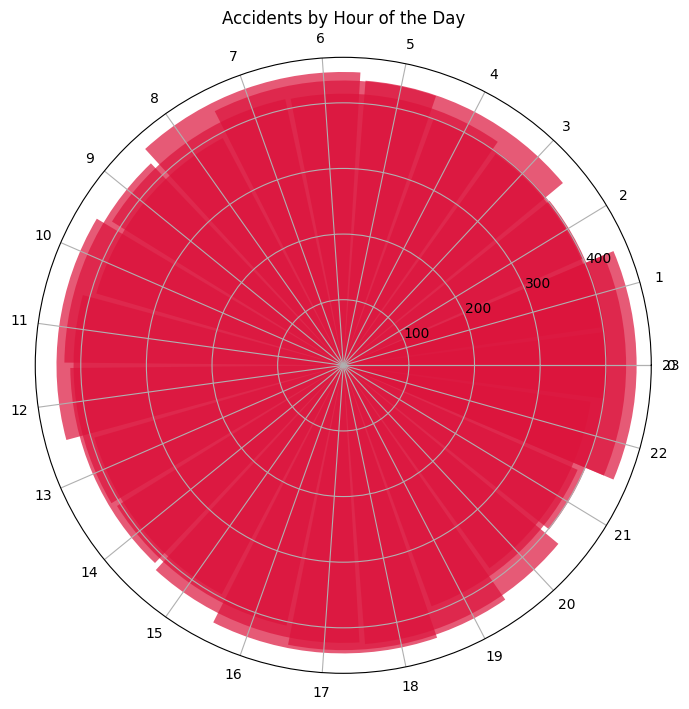

In [54]:
import numpy as np

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour  # Convert Time to Hours
hourly_counts = df['Hour'].value_counts().sort_index()

theta = np.linspace(0, 2 * np.pi, len(hourly_counts))  # Convert hours to angles
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, hourly_counts, color='crimson', alpha=0.7)

ax.set_xticks(theta)
ax.set_xticklabels(hourly_counts.index)
ax.set_title("Accidents by Hour of the Day")
plt.show()


**from this we can say that accident by the hour is occured every hour**

# 2.localization based insights

In [19]:
df['Location'].value_counts().head(10)

Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
London, UK           1000
Paris, France         995
Tokyo, Japan          989
Mumbai, India         987
Berlin, Germany       958
Name: count, dtype: int64

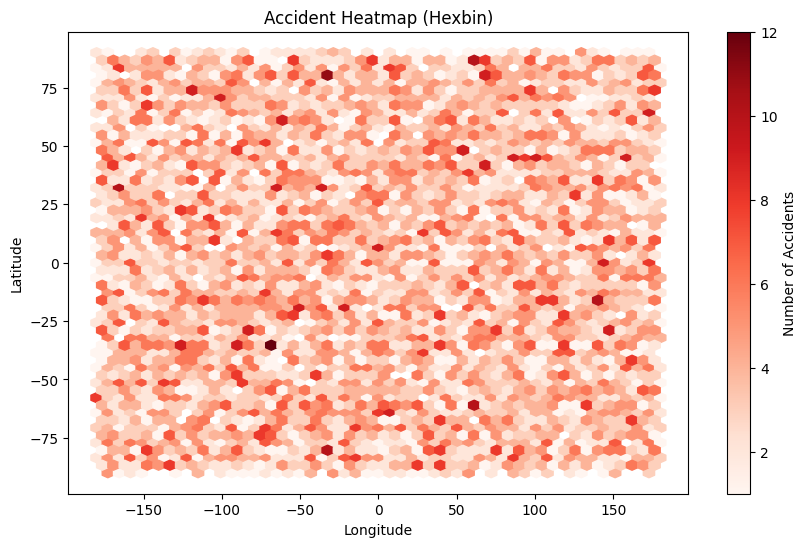

In [26]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Longitude'], df['Latitude'], gridsize=50, cmap='Reds', mincnt=1)
plt.colorbar(label="Number of Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Heatmap (Hexbin)")
plt.show()


**from this we can say that based on latitude and longitude , the accidents occured equaly**

# 3.Accident by road and weather conditions

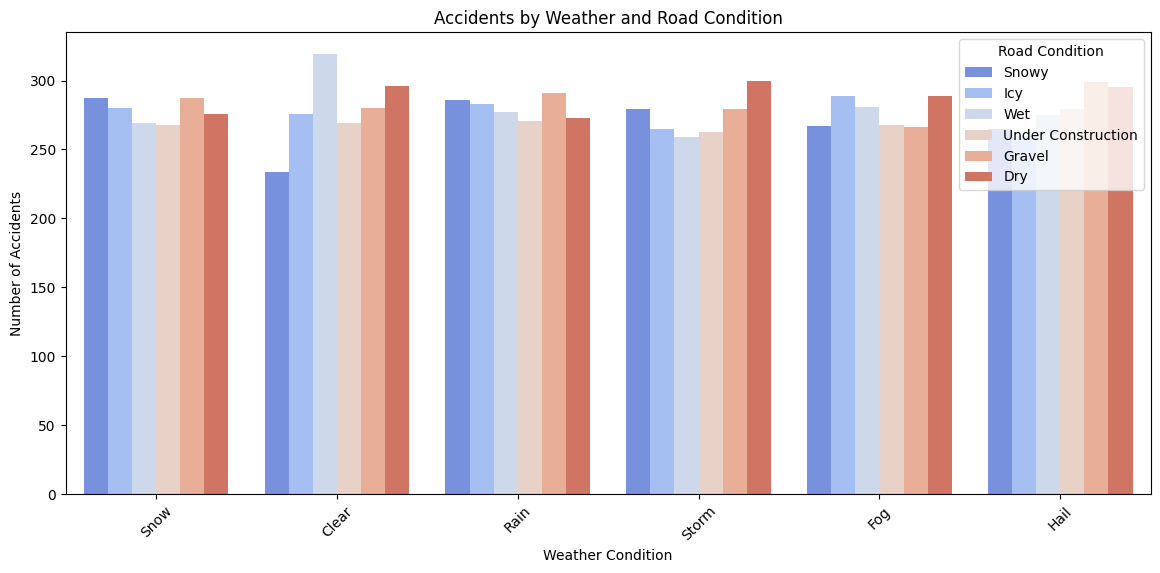

In [31]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Weather Condition', hue='Road Condition', palette="coolwarm")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Weather and Road Condition")
plt.xticks(rotation=45)
plt.legend(title="Road Condition")
plt.show()


**from the above graph above the accidents are occured mostly in cleared weather condition**

# 4.Casualties by weather conditions

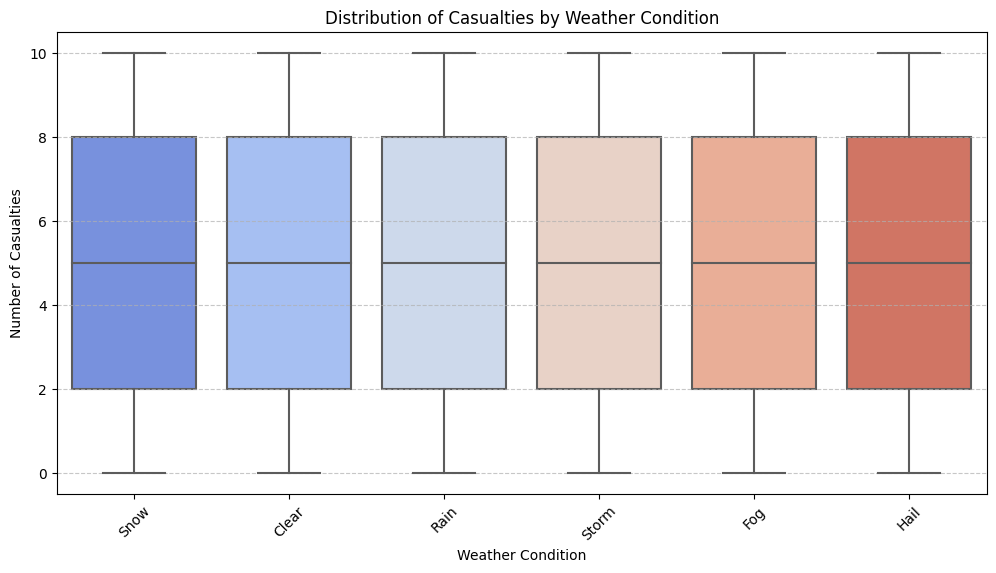

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather Condition', y='Casualties', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Weather Condition")
plt.ylabel("Number of Casualties")
plt.title("Distribution of Casualties by Weather Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**the no of casuality based on weather condition is equal**

# 5.Casualties on Vehicle involved

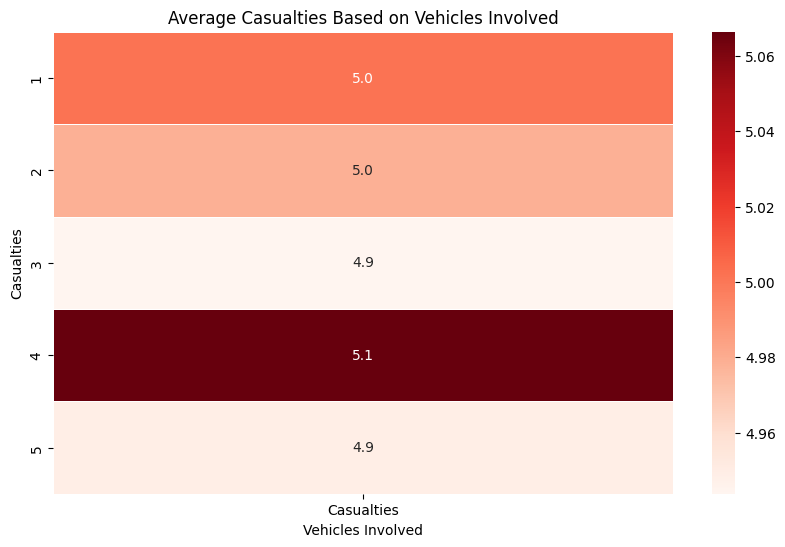

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute average casualties for each number of vehicles involved
pivot_table = df.pivot_table(values='Casualties', index='Vehicles Involved', aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel("Vehicles Involved")
plt.ylabel("Casualties")
plt.title("Average Casualties Based on Vehicles Involved")
plt.show()


**we can say that the average casuality based on vehicle ranges between 4.9 to 5.0**

# 6.Top 10 causes of Accidents

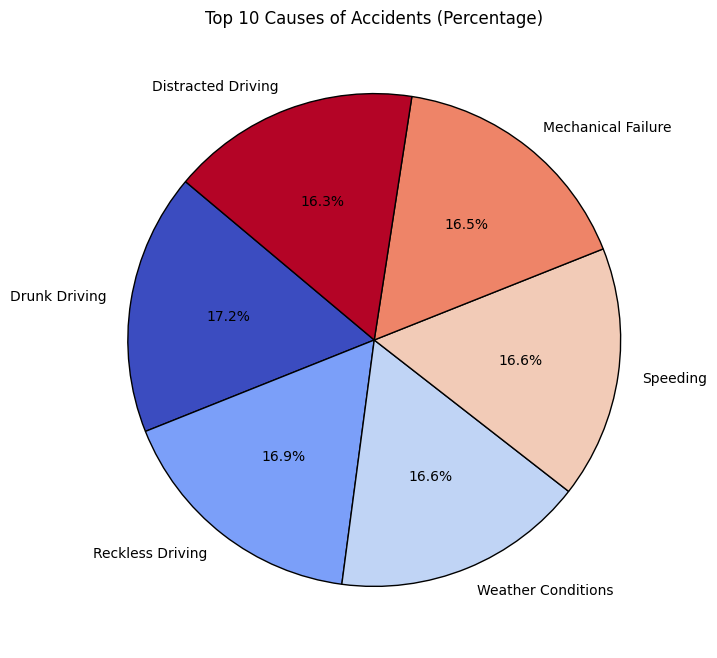

In [38]:
plt.figure(figsize=(8, 8))
df['Cause'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='coolwarm', wedgeprops={'edgecolor': 'black'})
plt.ylabel('')
plt.title("Top 10 Causes of Accidents (Percentage)")
plt.show()


**from this we can say the major cause of road accident is drunk and drive**

# 7. Overview of  Accident causes and road conditions

In [40]:
import plotly.express as px

fig = px.sunburst(df, path=['Cause', 'Road Condition'], values='Casualties', color='Casualties',
                  color_continuous_scale='Reds', title="Accident Causes and Road Conditions")
fig.show()


# These are the analysis of traffic road accident 